In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

π = np.pi
t_0 = 13.78e9      # in units of years
t_m = 13.78e9        # in units of years , let t=t_0 (i.e. calcluating the merger rate today)
σ_eq = 0.005


m_1 = 6
m_2 = 8

y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy = (y_2-y_1)


y_list = np.zeros(10)

for i in range(len(y_list)):
    y_list[i]= (y_1 + (i*dy))
    

M_1_list = np.zeros(len(y_list))
M_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    M_1_list[i] = (np.ceil(np.exp(y)))
    M_2_list[i] = (np.ceil(np.exp(y)))
    

            
m_1_list=[int(M_1) for M_1 in M_1_list]
m_2_list=[int(M_2) for M_2 in M_2_list]

    
Δ_1_list=np.zeros(len(y_list))
Δ_2_list=np.zeros(len(y_list))

for i, y in enumerate(y_list):
    Δ_1_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy)
    Δ_2_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy) 

    
print("m_1 = ", m_1_list)

m_1 =  [6, 8, 11, 15, 19, 26, 34, 45, 60, 80]


In [2]:
# merger rate for Δ_1=Δ_2=Δ.
def Merger_equal_deltas(m_1, m_2, Δ, t_m):
    return 3.9e6 * (f**2) *((t_m/t_0)**(-34/37))* ((f**2 + σ_eq**2)**(-21/74)) * np.minimum((P(m_1))/m_1, (P(m_2))/m_2) * ((P(m_1))/m_1 + (P(m_2))/m_2) * ((m_1*m_2)**(3/37)) * ((m_1+m_2)**(36/37))* ( Δ**2)
    
    


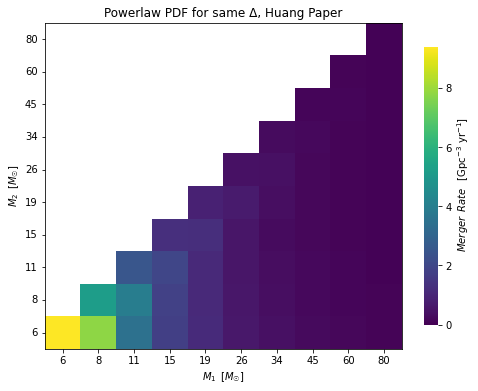

In [3]:

# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2 with Δ_1=Δ_2=Δ.



Merger_PWR = np.zeros((10, 10))


for i in range(10):
    for j in range(10):
        
        f_pbh = 4.3e-3
        f = 0.85*f_pbh
   
        def P(m):     #Powerlaw PBH mass distribution
            α = 1.6
            M = 5       #in units of M☉
            return ((α-1)/M) * ((m/M)**(-α))


        if i==j:
            Merger_PWR[i, j] = 0.5 * Merger_equal_deltas(m_1_list[i], m_2_list[j], Δ_1_list[i], t_m) 
            
        else:
            Merger_PWR[i, j] = Merger_equal_deltas(m_1_list[i], m_2_list[j], Δ_1_list[i], t_m) 



mask = np.tril(np.ones((10,10)),k=-1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax= plt.subplots(figsize=(8, 6))  

ax = sns.heatmap(Merger_PWR, mask=mask,  cmap='viridis', cbar=True,
                 cbar_kws={"shrink": 0.85,'label': ' $Merger\hspace{0.5}Rate \hspace{0.5}$ [Gpc$^{-3}$ yr$^{-1}$]'},
                 vmin=0)




ax.set_xticklabels(m_1_list)
ax.set_yticklabels(m_2_list,rotation = 360)

# make frame visible
for _, spine in ax.spines.items():
    spine.set_visible(True)


    
ax.invert_yaxis()
plt.xlabel('$M_{1}\hspace{0.5}[M_{☉}]$')
plt.ylabel('$M_{2}\hspace{0.5}[M_{☉}]$')
plt.title('Powerlaw PDF for same Δ, Huang Paper')
plt.savefig('Huang, Powerlaw PDF for same Δ.pdf')
plt.show()     


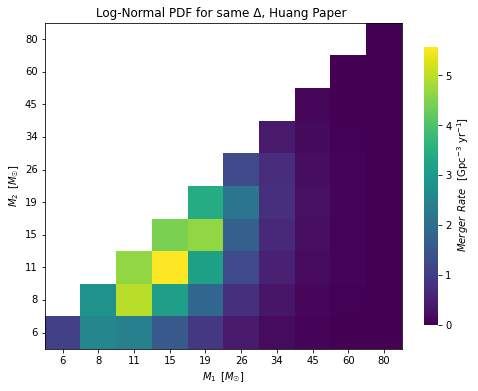

In [4]:
# Calculation of the 2D merger rate for Log-Normal PBH mass Distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2 with Δ_1=Δ_2=Δ.



   
Merger_lognormal = np.zeros((10, 10))


for i in range(10):
    for j in range(10):
        
        
        f_pbh = 3.7e-3
        f = 0.85*f_pbh 


        def P(m):               #Log-Normal PBH mass Distribution
            σ = 0.6
            m_c = 15              #in units of M☉
            return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))

        if i==j:
            Merger_lognormal[i, j] = 0.5 * Merger_equal_deltas(m_1_list[i], m_2_list[j], Δ_1_list[i], t_m) 
            
        else:
            Merger_lognormal[i, j] = Merger_equal_deltas(m_1_list[i], m_2_list[j], Δ_1_list[i], t_m) 



mask = np.tril(np.ones((10,10)),k=-1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax= plt.subplots(figsize=(8, 6))  

ax = sns.heatmap(Merger_lognormal, mask=mask,  cmap='viridis', cbar=True,
                 cbar_kws={"shrink": 0.85,'label': ' $Merger\hspace{0.5}Rate \hspace{0.5}$ [Gpc$^{-3}$ yr$^{-1}$]'},
                 vmin=0)



ax.set_xticklabels(m_1_list)
ax.set_yticklabels(m_2_list,rotation = 360)



# make frame visible
for _, spine in ax.spines.items():
    spine.set_visible(True)


    
ax.invert_yaxis()
plt.xlabel('$M_{1}\hspace{0.5}[M_{☉}]$')
plt.ylabel('$M_{2}\hspace{0.5}[M_{☉}]$')
plt.title('Log-Normal PDF for same Δ, Huang Paper ')
plt.savefig('Huang, Log-Normal PDF for same Δ.pdf')
plt.show()     

In [5]:
# merger rate for Δ_1 not equal to Δ_2
def Merger_unequal_deltas(m_1, m_2, Δ_1, Δ_2, t_m):
    return 3.9e6 * (f**2) *((t_m/t_0)**(-34/37))* ((f**2 + σ_eq**2)**(-21/74)) * np.minimum((P(m_1)*Δ_1)/m_1, (P(m_2)*Δ_2)/m_2) * ((P(m_1)*Δ_1)/m_1 + (P(m_2)*Δ_2)/m_2) * ((m_1*m_2)**(3/37)) * ((m_1+m_2)**(36/37))
    
   

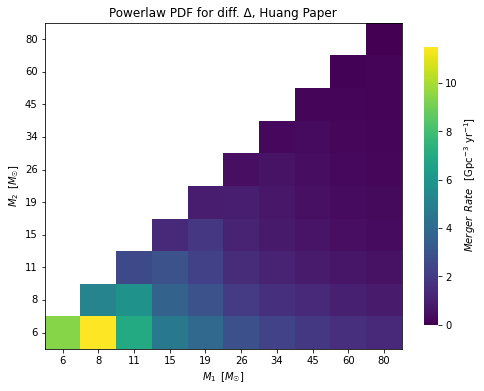

In [6]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.


    
Merger = np.zeros((10,10))


for i in range(10):
    for j in range(10):
        
        f_pbh = 4.3e-3
        f  =  0.85*f_pbh 
   
        def P(m):     #Powerlaw PBH mass distribution
            α = 1.6
            M = 5       #in units of M☉
            return ((α-1)/M) * ((m/M)**(-α))

        if i==j:
            Merger[i, j] = 0.5*Merger_unequal_deltas(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m)
            
        else:
            Merger[i, j] = Merger_unequal_deltas(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m)
            



mask = np.tril(np.ones((10,10)),k=-1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax= plt.subplots(figsize=(8, 6))  

ax = sns.heatmap(Merger, mask=mask,  cmap='viridis', cbar=True,
                 cbar_kws={"shrink": 0.85,'label': ' $Merger\hspace{0.5}Rate \hspace{0.5}$ [Gpc$^{-3}$ yr$^{-1}$]'},
                 vmin=0)





ax.set_xticklabels(m_1_list)
ax.set_yticklabels(m_2_list,rotation = 360)



# make frame visible
for _, spine in ax.spines.items():
    spine.set_visible(True)


    
ax.invert_yaxis()
plt.xlabel('$M_{1}\hspace{0.5}[M_{☉}]$')
plt.ylabel('$M_{2}\hspace{0.5}[M_{☉}]$')
plt.title('Powerlaw PDF for diff. Δ, Huang Paper')
plt.savefig('Huang, Powerlaw,diff Δ.pdf')
plt.show()     

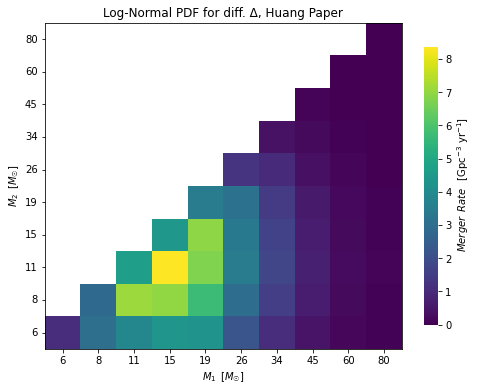

In [7]:
# Calculation of the 2D merger rate for Log-Normal PBH mass Distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.


    
Merger_12 = np.zeros((10, 10))


for i in range(10):
    for j in range(10):
        
        f_pbh = 3.7e-3
        f = 0.85*f_pbh   
    
    
        def P(m):               #Log-Normal PBH mass Distribution
            σ = 0.6
            m_c = 15               #in units of M☉
            return (1/(σ * m * np.sqrt(2*π))) * np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))

        if i==j:
            Merger_12[i, j] = 0.5*Merger_unequal_deltas(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m)
            
        else:
            Merger_12[i, j] = Merger_unequal_deltas(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m)
            

            


mask = np.tril(np.ones((10,10)),k=-1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax= plt.subplots(figsize=(8, 6))  

ax = sns.heatmap(Merger_12, mask=mask,  cmap='viridis', cbar=True, 
                 cbar_kws={"shrink": 0.85,'label': ' $Merger\hspace{0.5}Rate \hspace{0.5}$ [Gpc$^{-3}$ yr$^{-1}$]'},
                 vmin=0)



ax.set_xticklabels(m_1_list)
ax.set_yticklabels(m_2_list,rotation = 360)
# Calculation of the 2D merger rate for Log-Normal PBH mass Distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.


    
Merger_12 = np.zeros((10, 10))


for i in range(10):
    for j in range(10):
        
        f_pbh = 3.7e-3
        f = 0.85*f_pbh   
    
    
        def P(m):               #Log-Normal PBH mass Distribution
            σ = 0.6
            m_c = 15               #in units of M☉
            return (1/(σ * m * np.sqrt(2*π))) * np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))

        if i==j:
            Merger_12[i, j] = 0.5*Merger_unequal_deltas(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m)
            
        else:
            Merger_12[i, j] = Merger_unequal_deltas(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m)
            

            


mask = np.tril(np.ones((10,10)),k=-1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax= plt.subplots(figsize=(8, 6))  

ax = sns.heatmap(Merger_12, mask=mask,  cmap='viridis', cbar=True, 
                 cbar_kws={"shrink": 0.85,'label': ' $Merger\hspace{0.5}Rate \hspace{0.5}$ [Gpc$^{-3}$ yr$^{-1}$]'},
                 vmin=0, vmax=5)



ax.set_xticklabels(m_1_list)
ax.set_yticklabels(m_2_list,rotation = 360)


# make frame visible
for _, spine in ax.spines.items():
    spine.set_visible(True)

ax.invert_yaxis()
plt.xlabel('$M_{1}\hspace{0.5}[M_{☉}]$')
plt.ylabel('$M_{2}\hspace{0.5}[M_{☉}]$')
plt.title('Log-Normal PDF for diff. Δ, Huang Paper')
plt.savefig('Huang, Log-Normal PDF for diff Δ.pdf')
plt.show()     

# make frame visible
for _, spine in ax.spines.items():
    spine.set_visible(True)

ax.invert_yaxis()
plt.xlabel('$M_{1}\hspace{0.5}[M_{☉}]$')
plt.ylabel('$M_{2}\hspace{0.5}[M_{☉}]$')
plt.title('Log-Normal PDF for diff. Δ, Huang Paper')
plt.savefig('Huang, Log-Normal PDF for diff Δ.pdf')
plt.show()     